In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches
import random
import geopandas as gpd
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import time

path = r'D:\Work\江西合作团队\PKU_CH4.xlsx'

df = pd.DataFrame()
fdir = pd.read_excel(path, sheet_name=None)
fdir1 = pd.read_excel(path, sheet_name=1)

df_sum = fdir['Other'].iloc[:, 2:] + fdir['Other1'].iloc[:, 2:] + fdir['Other2'].iloc[:, 2:]
df1 = pd.concat([fdir['Other'].iloc[:, :2], df_sum], axis=1)
vrs = ['Other', 'Other1', 'Other2']
for vr in vrs:
    del fdir[vr]
fdir['other'] = df1
keys = list(fdir.keys())

df0 = fdir1.iloc[:, [1]]  # 市名
key0 = list(fdir.keys())

lst = []
names = []
for name in df0['NAME']:
    locals()[f'df_{name}'] = pd.DataFrame()
    for value in fdir.values():
        dfn = value[value['NAME'] == name].loc[:, 2000:2019]
        dfn = dfn / (1000000000000000)
        locals()[f'df_{name}'] = pd.concat([locals()[f'df_{name}'], dfn], axis=0)
    locals()[f'df_{name}'].index = key0
    lst.append(locals()[f'df_{name}'])
    names.append(name)


In [2]:
def get_colors(n):
    colors = []
    for i in range(n):
        color = ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
        colors.append('#' + color)
    return colors

In [3]:
grid_mat = [
    [1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 0, 0, 0, 0, 1, 1],
    [1, 1, 0, 0, 0, 0, 1, 1],
    [1, 1, 0, 0, 0, 0, 1, 1],
    [1, 1, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1]
]
colors = get_colors(32)

In [4]:
path_polygon = r'D:\Work\江西合作团队\boundary\proidalbers.shp'
path_line = r'D:\Work\江西合作团队\boundary\boundaryline.shp'

In [ ]:
gdf_pl.plot()

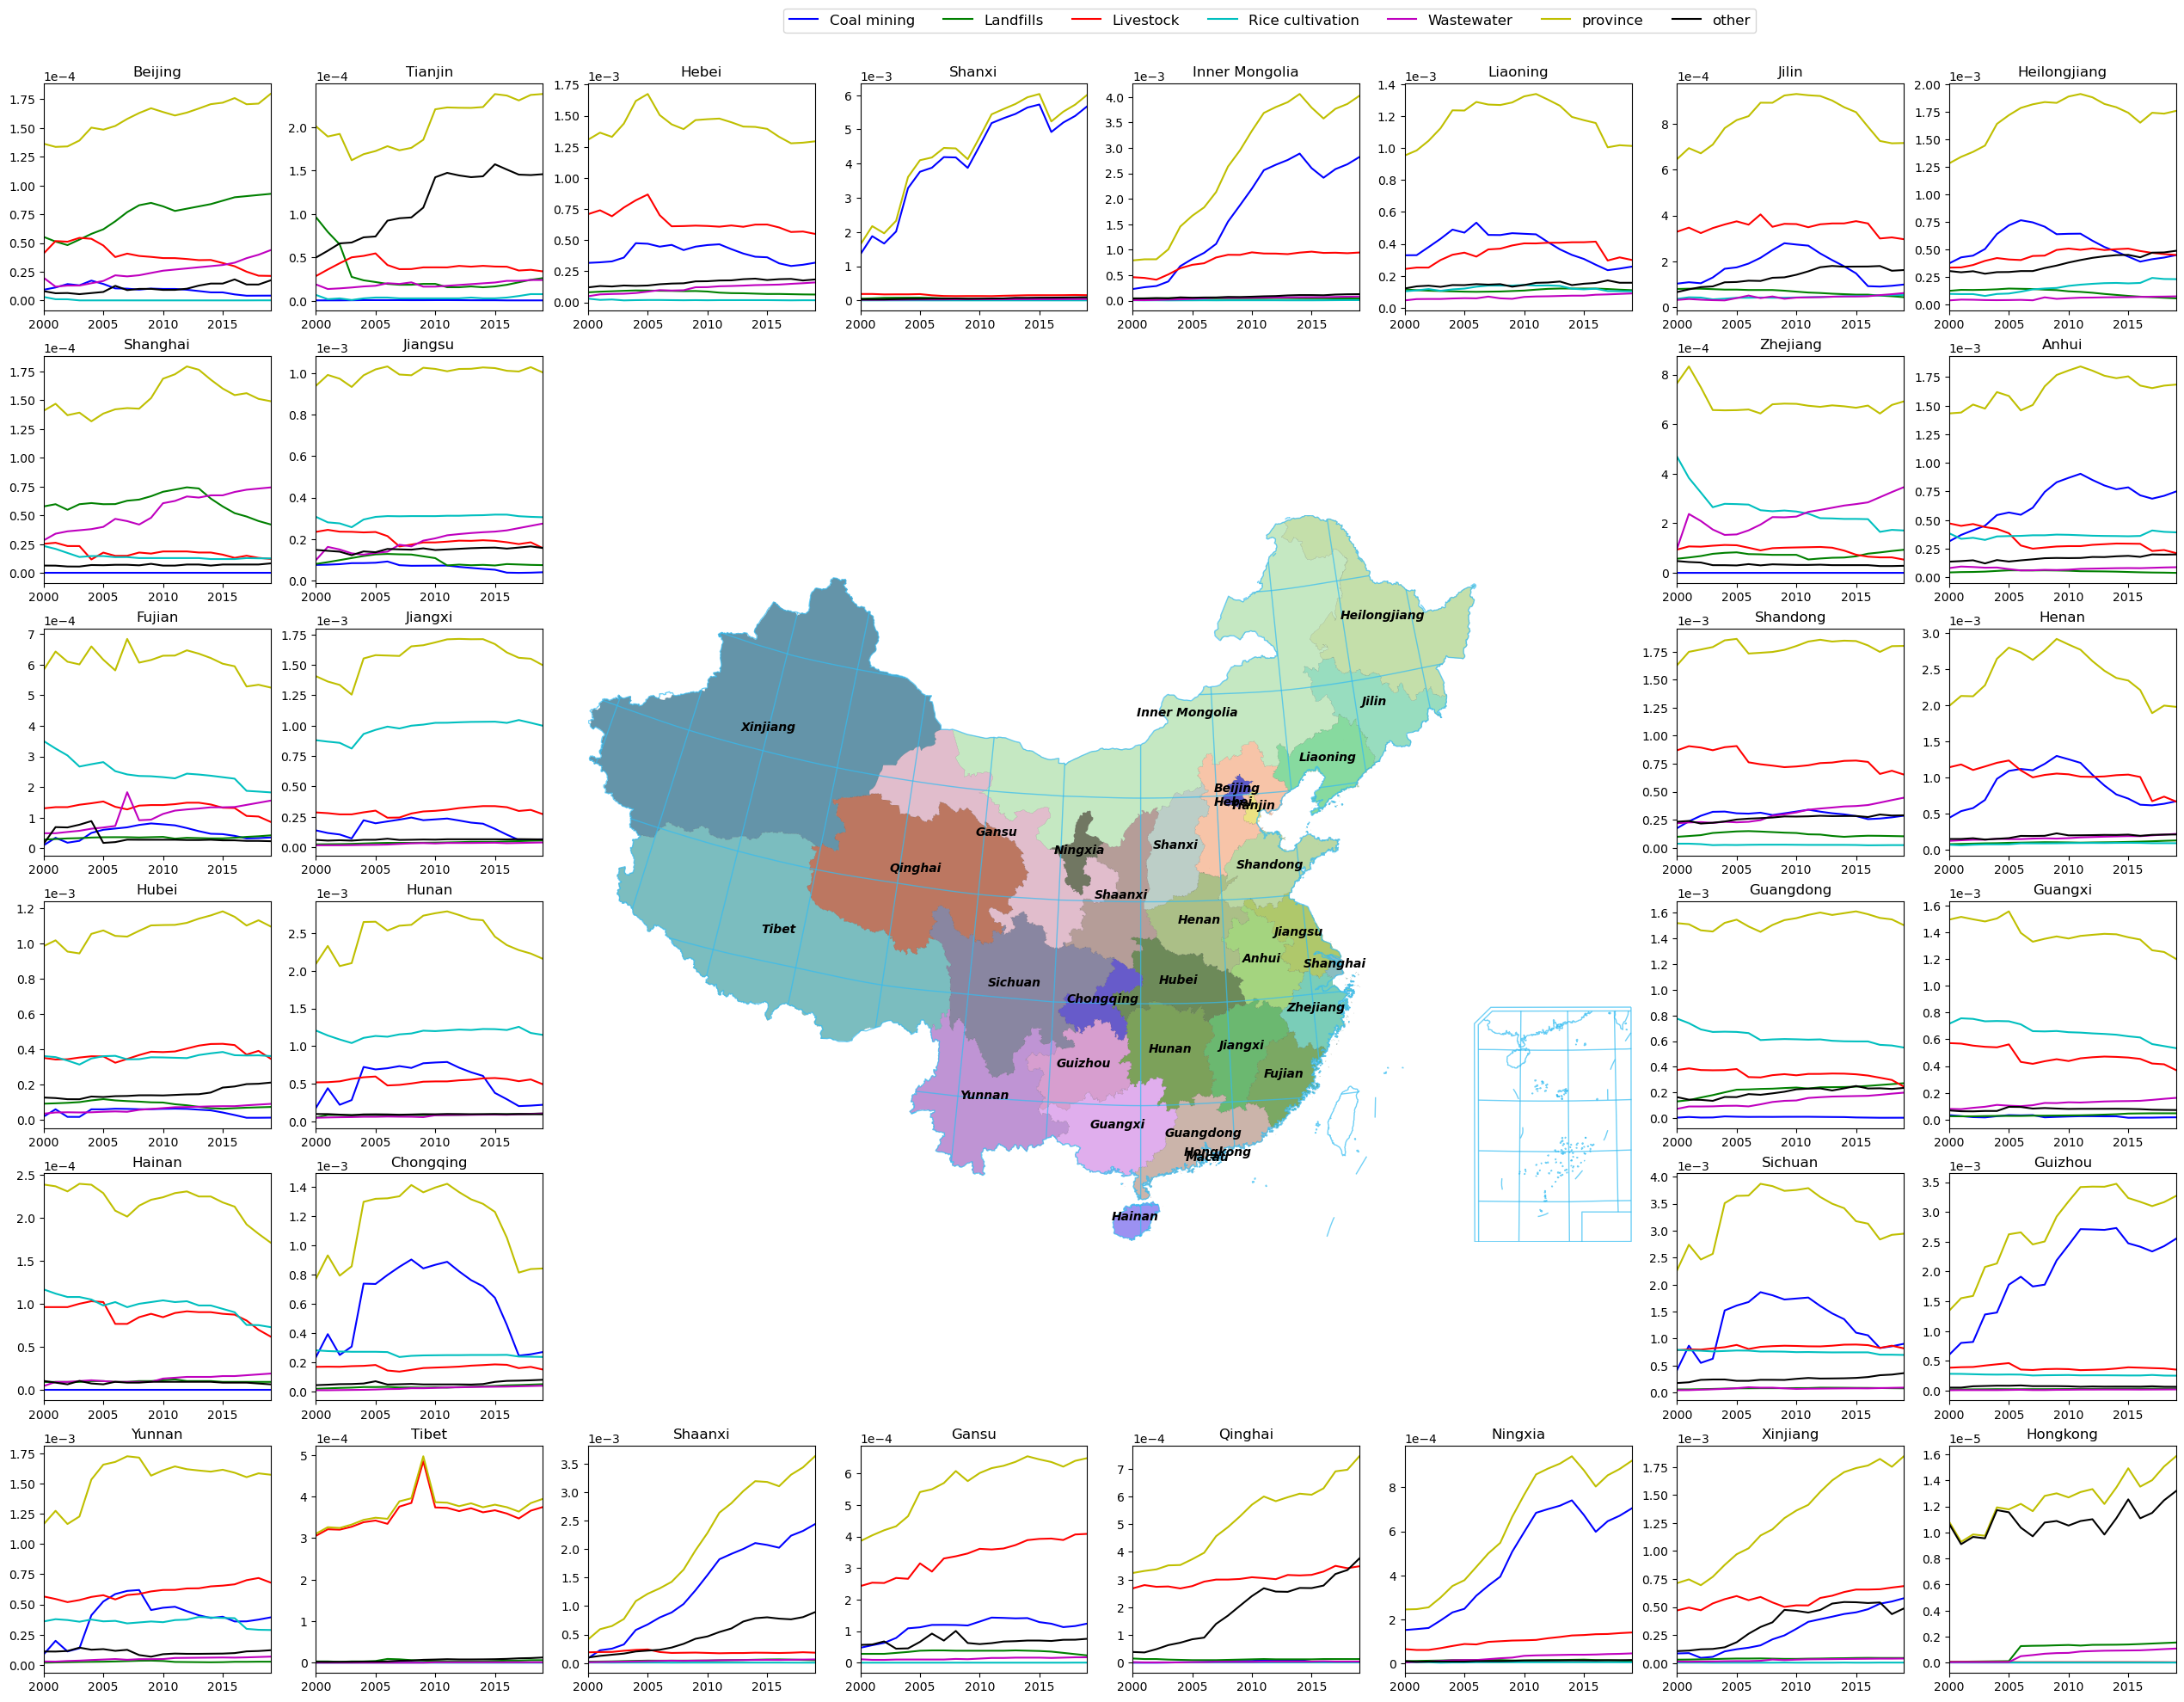

4.50737190246582

In [5]:
star = time.time()
# grid_size为网格长宽
grid_size = 4
# row 为 网格的 行数
row = len(grid_mat)
# col为网格列数
col = len(grid_mat[0])
# 设置画布大小
fig = plt.figure(figsize = (grid_size*col, grid_size*row))
# 定义网格
grid = GridSpec(row, col)

lst2 = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
x = np.arange(2000, 2020)

p = 0
# grid_x 控制子图绘制在哪一行
for grid_x, i in enumerate(grid_mat):
    # grid_y控制子图绘制在哪一列
    for grid_y, j in enumerate(i):
        # 当矩阵中为0时，不绘制子图，留空位
        if j == 0:
            continue
        # 当矩阵中不为0时绘制子图
        ax = fig.add_subplot(grid[grid_x, grid_y])
        # 循环绘制点线图
        for t in range(7):
            y = lst[p].iloc[t, :]
            ax.plot(x, y, color=lst2[t], label=key0[t])
        # 设置标题
        ax.set_title(names[p])
        # 坐标轴设置
        ax.set(xlim=(2000, 2019), xticks=np.arange(2000, 2019, 5))
        ax.ticklabel_format(style='sci', scilimits=(-1, 2), axis='y')
        p += 1

dic = {'Guangdong':(0.4,0.6),'Hainan':(0,0.9),'Macau':(0,-5),'Hongkong':(1,1), 'Hebei':(0.1,0.3),
       'Shanxi':(0.2,0.4), 'Jiangxi': (0.2,0.5), 'Inner Mongolia':(0.2,0.2), 'Gansu':(0.2,0.7),
       'Shaanxi':(0.3,0.3)}

# geopandas 读取矢量shp
gdf_pl = gpd.read_file(path_line)
gdf_py = gpd.read_file(path_polygon).to_crs(gdf_pl.crs)

# 设置中间子图位置
ax = fig.add_subplot(grid[1:5, 2:6])

# 使用颜色color表自定义camp色带
newcmp = LinearSegmentedColormap.from_list('chaos',colors)
# 绘制面状矢量图，应用camp
gpd.plotting.plot_dataframe(gdf_py, ax=ax, edgecolor='black', linewidth=0.05, cmap=newcmp, alpha=0.7)

# 循环标注城市名称
for i, record in gdf_py.iterrows():
    name = record['NAME']
    # bound = record.geometry.bounds
    x = record.geometry.centroid.x
    y = record.geometry.centroid.y
    
#     x_l = bound[2]-bound[0]
#     y_l = bound[3]-bound[1]
    
#     if name in dic:
#         x = bound[0]+dic[name][0]*x_l
#         y = bound[1]+dic[name][1]*y_l
    
#     else:
#         x = bound[0]+x_l*0.3
#         y = bound[1]+y_l*0.5
    
    ax.text(x, y, name, fontsize=10,fontstyle='oblique',fontweight= 'bold',  horizontalalignment='center')

# 绘制经纬网线状矢量图
gpd.plotting.plot_dataframe(gdf_pl, linewidth=1, color='#33bcf2', ax=ax, alpha=0.7)

# 设置坐标轴范围来放大图像
bounds = gdf_pl.bounds
ax.set_xlim((bounds['minx'].min(), bounds['maxx'].max()))
ax.set_ylim((bounds['miny'].min(), bounds['maxy'].max()))

# 隐藏坐标轴
ax.axis('off')

# 定义图例
labels = lst[1].index
fig.legend(labels, bbox_to_anchor=(0.75, 0.92), ncol=7, fontsize='large', title_fontsize="10")

plt.show()
time.time() - star

In [1]:
import geemap
import ee

Map = geemap.Map()
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [2]:
import os

os.chdir('D:/Work/WinterWheat/')

In [3]:
image = ee.Image('users/2431566134liumonarch/XJ_class3')
# landcover = image.set('classification_class_values', class_values)**
# landcover = landcover.set('classification_class_palette', class_palette)
Map.addLayer(image.mask(image.eq(1)), {'min': 0, 'max': 1}, 'landcover')

In [4]:
xj_shp = geemap.shp_to_ee('XJ.shp')
xj_roi = xj_shp.geometry()
Map.addLayer(xj_roi, {}, 'xj_roi')
Map.center_object(xj_roi)

In [5]:
geemap.download_ee_image(image, 'WinterWheat_2022.tif', xj_roi, 'epsg:4236', scale=30)

Consider adjusting `region`, `scale` and/or `dtype` to reduce the WinterWheat_2022.tif download size (raw: 18.71 GB).


WinterWheat_2022.tif: |                                               | 0.00/18.7G (raw) [  0.0%] in 00:00 (et…

There is no STAC entry for: users/2431566134liumonarch/XJ_class3
